In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
import cv2
from PIL import Image as Image_PIL
from os import listdir
from matplotlib.image import imread
import time
from random import sample
from sklearn import manifold, decomposition, preprocessing
from sklearn.model_selection import train_test_split


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

D:\Users\Damien\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Dataframe

In [2]:
df = pd.read_csv(
    r"C:\Users\Damien\Desktop\Data Scientist\P6\Dataset\Flipkart\flipkart_com-ecommerce_sample_1050.csv")
df.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

#### Séparation catégories

In [3]:
df['product_category_tree'].nunique()

642

In [4]:
# Traitement des catégories
def split_categories(category, level):
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat)) < 2:
            cat = [cat[0], 'None', 'None']
    return cat[level]


def split_categories_1(category):
    return split_categories(category, 0)


def split_categories_2(category):
    return split_categories(category, 1)


def split_categories_3(category):
    return split_categories(category, 2)


def detail_categories(dataframe):
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(
        split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(
        split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(
        split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)

In [5]:
df = detail_categories(df)

In [6]:
df.to_csv(
    r'C:\Users\Damien\Desktop\Data Scientist\P6\Dataset\images_clean.csv', index=False)

In [7]:
df.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications        cat_lvl_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                cat_lvl_2         cat_lvl_3  
0  Curtains & Accessories          Curtains  
1        Baby Bath & Skin  Baby Bath Towels  
2        Baby Bath & Skin  Baby Bath Towels  
3               Bed Linen         Bedsheets  
4               Bed Linen         Bedsheets

<AxesSubplot:>

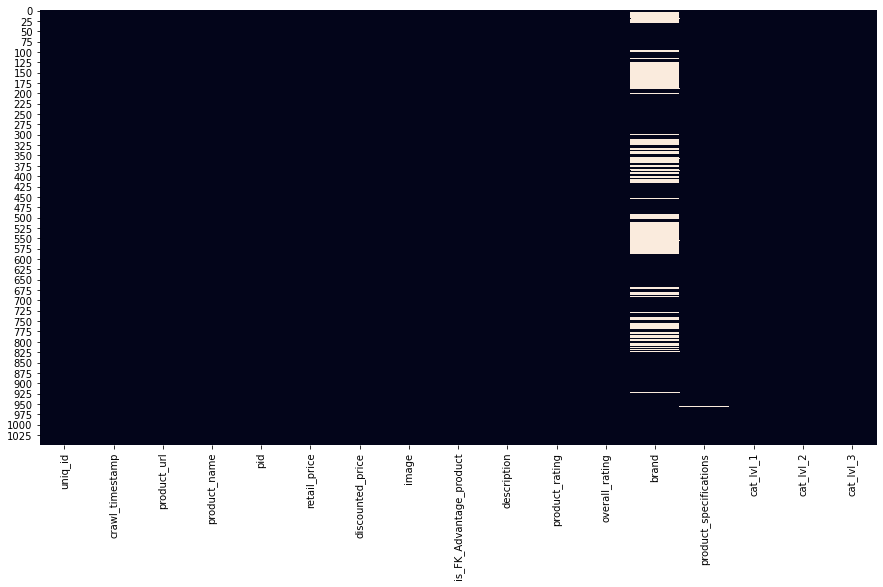

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isna(), cbar=False)

In [9]:
df['cat_lvl_1'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [10]:
df['cat_lvl_2'].unique()

array(['Curtains & Accessories', 'Baby Bath & Skin', 'Bed Linen',
       'Wrist Watches', 'Living Room Furnishing', 'Bath Linen',
       'Candles & Fragrances', 'Tableware & Cutlery', 'Lighting',
       'JMD Home Furnishing', 'Infant Wear', "Kripa's Home Furnishing",
       'Hair Care', 'Coffee Mugs', 'Network Components',
       'Tablet Accessories', 'Cookware', 'Laptop Accessories', 'Makeup',
       'Combos and Kits', 'Feeding & Nursing', 'Baby Bedding',
       'Kitchen & Dining Linen', 'Containers & Bottles',
       'Consumables & Disposables', 'Wall Decor & Clocks',
       'Table Decor & Handicrafts', 'Flowers, Plants & Vases', 'Software',
       'Showpieces', 'Furniture & Furnishings',
       'Decorative Lighting & Lamps', 'Baby Grooming',
       'Computer Peripherals', 'Cushions, Pillows & Covers', 'Storage',
       'Health Care', 'Body and Skin Care', 'Kitchen Tools',
       'TRUE Home Decor & Festive Needs', 'Living', 'Showpiece',
       'Bar & Glassware', 'Fragrances', "Women'

In [11]:
df['cat_lvl_3'].unique()

array(['Curtains', 'Baby Bath Towels', 'Bedsheets',
       'Maserati Time Wrist Watches', 'Camerii Wrist Watches',
       'T STAR Wrist Watches', 'Alfajr Wrist Watches',
       'TAG Heuer Wrist Watches', 'Calibro Wrist Watches',
       'Cartier Wrist Watches', 'Lois Caron Wrist Watches',
       'Titan Wrist Watches', 'Srushti Art Jewelry Wrist Watches',
       'Escort Wrist Watches', 'Jack klein Wrist Watches',
       'North Moon Wrist Watches', 'Franck Bella Wrist Watches',
       'Ridas Wrist Watches', 'Skmei Wrist Watches', 'Now Wrist Watches',
       'fastrack Wrist Watches', 'Disney Wrist Watches',
       'Vizion Wrist Watches', 'Elantra Wrist Watches',
       'Marvel Wrist Watches', 'Lenco Wrist Watches',
       "D'Signer Wrist Watches", 'Diwan Sets', 'Duvet Covers',
       'Bath Mats', 'Home Fragrances', 'Jug, Glass & Tray Sets', 'Bulbs',
       'JMD Printed Cushions Cover (Pack of 2, 40 cm*40 ...',
       "Baby Girls' Clothes",
       "Kripa's Printed Cushions Cover (Pack of 2,

#### Import d'images

In [12]:
path = "C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


In [13]:
def list_fct(name):
    list_image_name = [df["image"][i]
                       for i in range(len(df)) if df["cat_lvl_1"][i] == name]
    return list_image_name

Home Furnishing


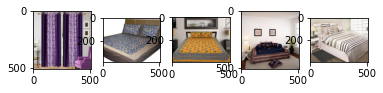

Baby Care


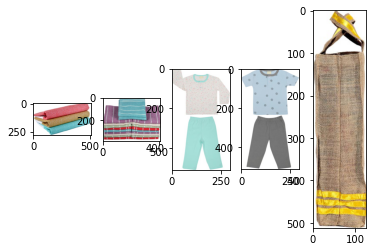

Watches


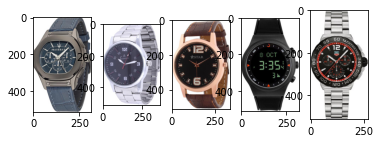

Home Decor & Festive Needs


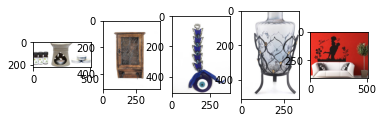

Kitchen & Dining


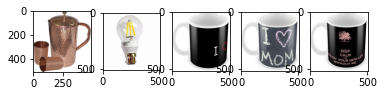

Beauty and Personal Care


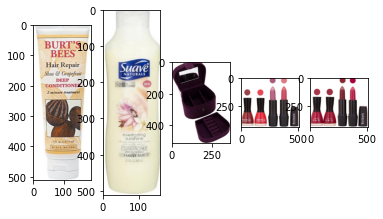

Computers


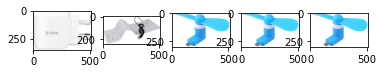

In [14]:
list_labels = ['Home Furnishing', 'Baby Care', 'Watches',
               'Home Decor & Festive Needs', 'Kitchen & Dining',
               'Beauty and Personal Care', 'Computers']

for name in list_labels:
    print(name)
    # print("-------")
    for i in range(5):
        plt.subplot(150 + 1 + i)
        filename = path + list_fct(name)[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

### Pré-traitement d'image

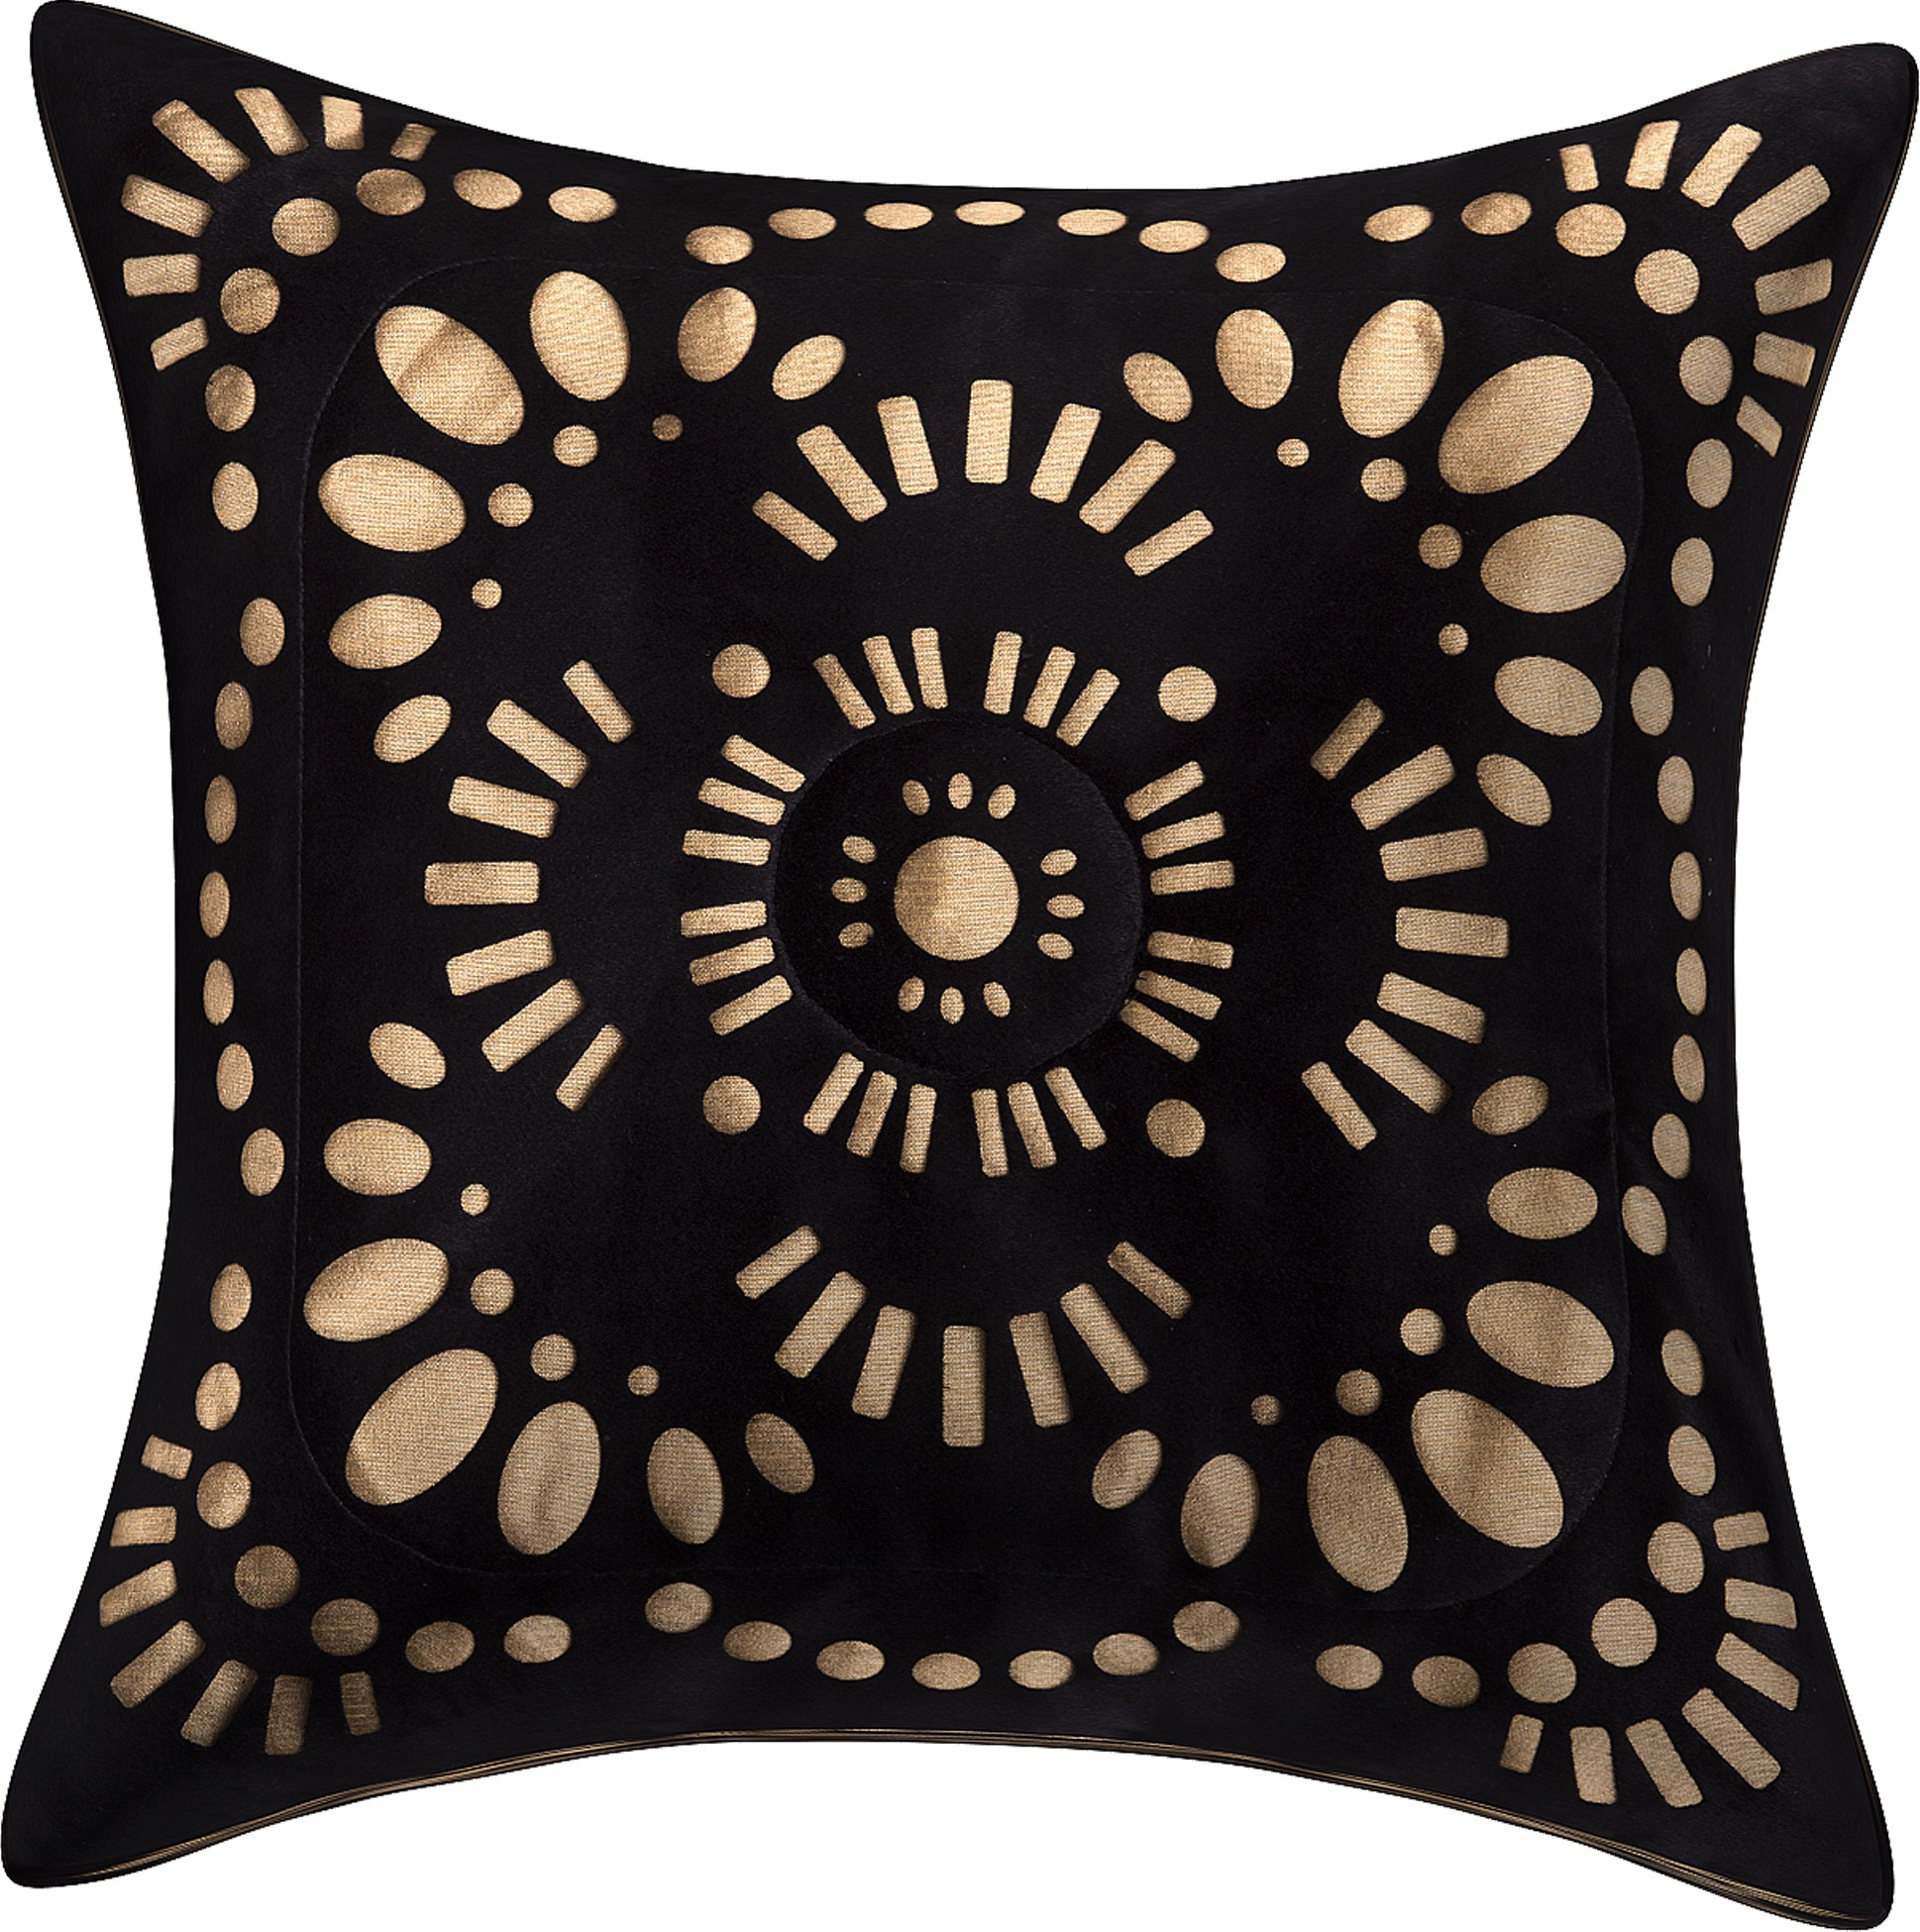

In [15]:
from IPython.display import Image
Image(r'C:\Users\Damien\Desktop\Data Scientist\P6\Dataset\Flipkart\Images\2eb07dc77e2fc7e3668fd7ed9b864039.jpg', width=200)

In [16]:
# Charger l'image comme matrice de pixels
img = np.array(Image_PIL.open(
    r'C:\Users\Damien\Desktop\Data Scientist\P6\Dataset\Flipkart\Images\2eb07dc77e2fc7e3668fd7ed9b864039.jpg'))

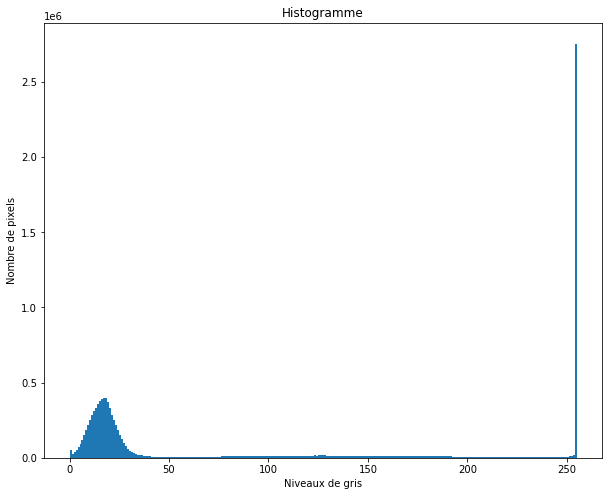

In [17]:
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.xlabel('Niveaux de gris')
plt.ylabel('Nombre de pixels')
plt.title('Histogramme')
plt.show()

#### Test bruit

In [18]:
# Copie de l'image
# img2 = img.copy()

In [19]:
# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
# noise = np.random.normal(0, 7, img2.shape)

In [20]:
# Créer l'image bruitée et l'afficher
# noisy_img = Image_PIL.fromarray(img2 + noise).convert('L')
# noisy_img.show()

### Descripteurs

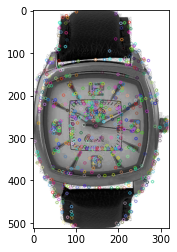

Descripteurs :  (755, 128)

[[ 21.   9.   0. ...   0.   1.   6.]
 [ 89.   5.   0. ...   0.   0.   0.]
 [  3.   1.   0. ...   0.   7.  18.]
 ...
 [  4.  24. 110. ...   0.   1.   4.]
 [  5.   3.   1. ...   0.   0.   1.]
 [ 15.   9.   0. ...   1.   3.  20.]]


In [21]:
sift = cv2.SIFT_create()
# convert in gray path, flag 0 for gray
image = cv2.imread(path+list_photos[90], 0)
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img = cv2.drawKeypoints(image, kp, image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [22]:
#resized_images = []

# for images in range(len(list_photos)) :
#image = Image_PIL.open(path+list_photos[images])
#resized_image = image.resize((128,128))
# resized_images.append(resized_image)

**Créations des descripteurs de chaque image**
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [23]:
sift_keypoints = []
temps1 = time.time()
sift = cv2.SIFT_create(1000)

for image_num in range(len(list_photos)):
    if image_num % 100 == 0:
        print(image_num)
    image = cv2.imread(path+list_photos[image_num], 0)  # convert in gray
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1 = time.time()-temps1
print("temps de traitement SIFT descriptor : ",
      "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (783051, 128)
temps de traitement SIFT descriptor :            30.79 secondes


D:\Users\Damien\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**Créations des clusters de descripteurs**

In [24]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1 = time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)
print("Création de", k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1 = time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  885
Création de 885 clusters de descripteurs ...
temps de traitement kmeans :            56.71 secondes


**Créations des features d'images**

In [25]:
# Creation of histograms (features)
temps1 = time.time()


def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(des)
    if nb_des == 0:
        print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors = []

for i, image_desc in enumerate(sift_keypoints_by_img):
    if i % 100 == 0:
        print(i)
    hist = build_histogram(kmeans, image_desc, i)  # calculates the histogram
    hist_vectors.append(hist)  # histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1 = time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             4.24 secondes


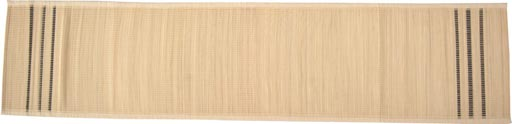

In [26]:
Image(path+list_photos[2])

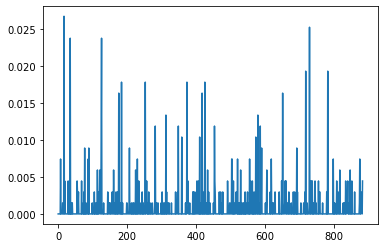

In [27]:
plt.plot(im_features[2])

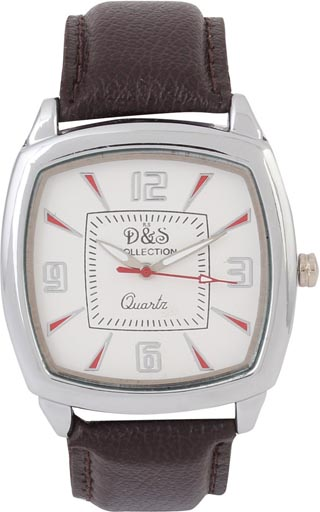

In [28]:
Image(path+list_photos[90], width=200)

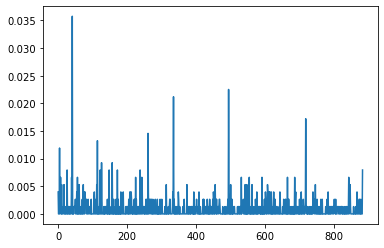

In [29]:
plt.plot(im_features[90])

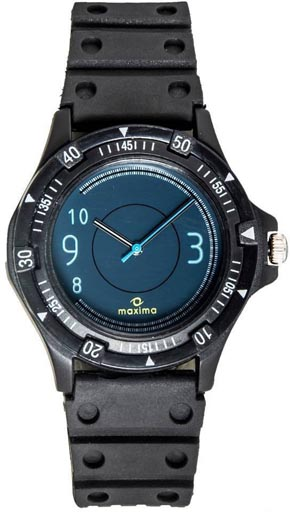

In [30]:
Image(path+list_photos[20], width=200)

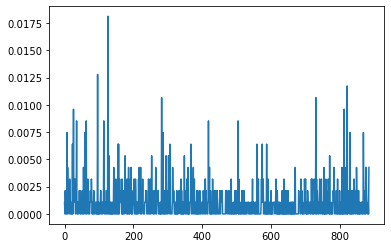

In [31]:
plt.plot(im_features[20])

#### SIFT

In [32]:
img3 = cv2.imread(
    r'C:\Users\Damien\Desktop\Data Scientist\P6\Dataset\Flipkart\Images\2eb07dc77e2fc7e3668fd7ed9b864039.jpg')

In [33]:
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [34]:
sift = cv2.SIFT_create()

In [35]:
kp = sift.detect(gray, None)

In [36]:
img = cv2.drawKeypoints(gray,
                        kp,
                        img3,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imwrite('image-with-keypoints.jpg', img3)

True

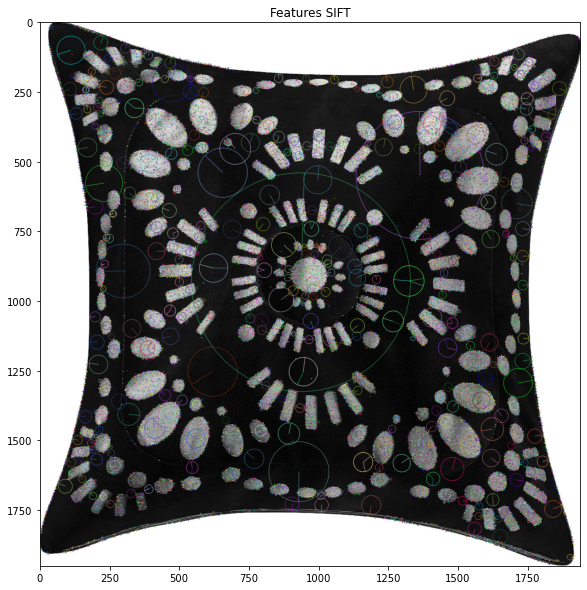

In [37]:
plt.figure(figsize=(10, 10))
plt.title('Features SIFT')
plt.imshow(img3)

### Reduction de dimensions Class LV1

#### PCA

In [38]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 885)
Dimensions dataset après réduction PCA :  (1050, 609)


#### T-SNE

In [39]:
# Faire une grid search pour changer les hyperparamètres, ou boucle for
# Regarder score silhouett, DB score
tsne = manifold.TSNE(n_components=2, perplexity=30,
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["cat_lvl_1"]
print(df_tsne.shape)

(1050, 3)


### Clustering

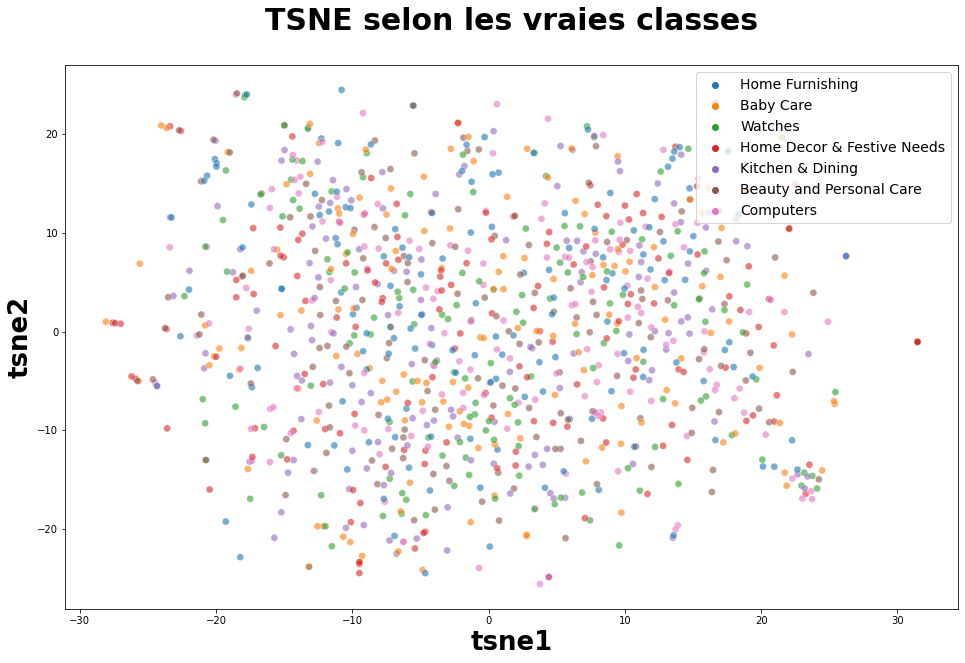

In [40]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes',
          fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})

plt.show()

#### Création de clusters d'images du TSNE

In [41]:
cls = cluster.KMeans(n_clusters=7)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [42]:
df_tsne.head(3)

tsne1      tsne2            class  cluster
0  -5.557169  22.895555  Home Furnishing        0
1  25.398342  -7.314849        Baby Care        4
2  -9.270807 -22.715034        Baby Care        3

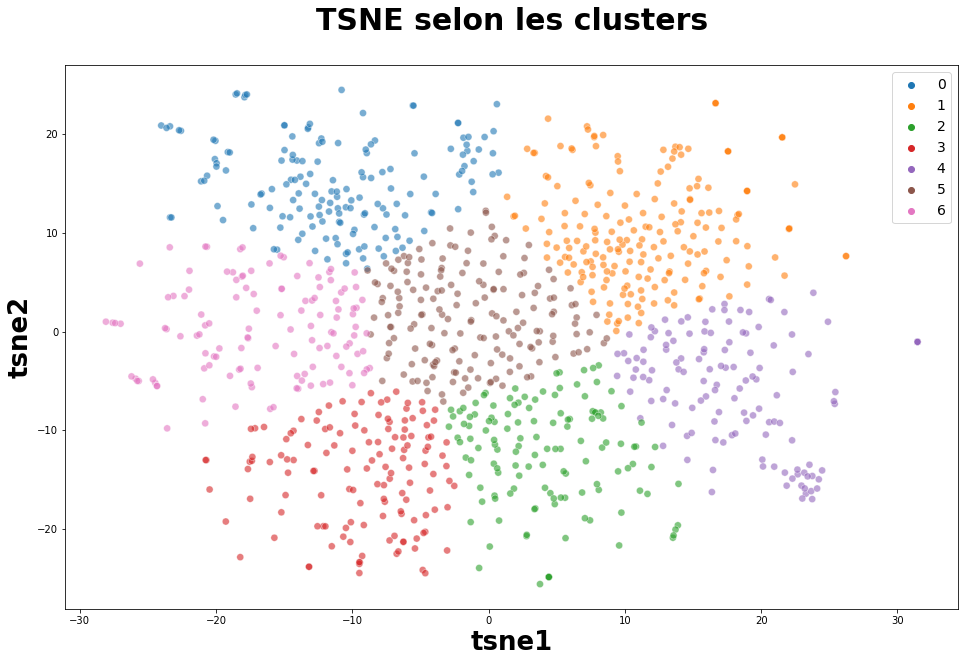

ARI :  -0.0012409172812223644


In [43]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')
plt.legend(prop={'size': 14})

plt.show()

labels = df_tsne["class"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

#### Analyse des clusters

In [44]:
le = preprocessing.LabelEncoder()
df_tsne["cat_label"] = le.fit_transform(df_tsne["class"])

In [45]:
df_tsne

tsne1      tsne2            class  cluster  cat_label
0     -5.557169  22.895555  Home Furnishing        0          4
1     25.398342  -7.314849        Baby Care        4          0
2     -9.270807 -22.715034        Baby Care        3          0
3      5.955652  -8.849340  Home Furnishing        2          4
4      1.004790  -2.327996  Home Furnishing        5          4
...         ...        ...              ...      ...        ...
1045  24.471310 -14.053449        Baby Care        4          0
1046  -2.824423  10.446085        Baby Care        5          0
1047  10.864320  -2.681169        Baby Care        4          0
1048  -9.942442   9.896101        Baby Care        0          0
1049  17.091751  10.505079        Baby Care        1          0

[1050 rows x 5 columns]

**Cat_labels:
0=Baby_are
1=Beauty_and_Personal_Care 
2=Computers 
3=Home Decor & Festive Needs
4=Home Furnishing 
5=Kitchen & Dining	
6=Watches**

In [46]:
df_tsne.groupby("cluster").count()["cat_label"]

cluster
0    159
1    197
2    133
3    136
4    131
5    170
6    124
Name: cat_label, dtype: int64

<AxesSubplot:>

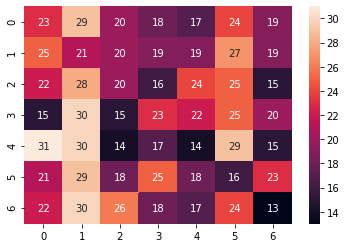

In [47]:
conf_mat = metrics.confusion_matrix(df_tsne["cat_label"], cls.labels_)
sns.heatmap(conf_mat, annot=True)

In [48]:
labels

0       Home Furnishing
1             Baby Care
2             Baby Care
3       Home Furnishing
4       Home Furnishing
             ...       
1045          Baby Care
1046          Baby Care
1047          Baby Care
1048          Baby Care
1049          Baby Care
Name: class, Length: 1050, dtype: object

In [49]:
def conf_mat_transform(y_true, y_pred):
    conf_mat = metrics.confusion_matrix(y_true, y_pred)

    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [3, 1, 2, 0, 4, 6, 5]
    print("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x: corresp[x])

    return labels['y_pred_transform']


cls_labels_transform = conf_mat_transform(df_tsne["cat_label"], cls.labels_)
conf_mat = metrics.confusion_matrix(df_tsne["cat_label"], cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(
    df_tsne["cat_label"], cls_labels_transform))

Correspondance des clusters :  [3, 1, 2, 0, 4, 6, 5]
[[18 29 20 23 17 19 24]
 [19 21 20 25 19 19 27]
 [16 28 20 22 24 15 25]
 [23 30 15 15 22 20 25]
 [17 30 14 31 14 15 29]
 [25 29 18 21 18 23 16]
 [18 30 26 22 17 13 24]]

              precision    recall  f1-score   support

           0       0.13      0.12      0.13       150
           1       0.11      0.14      0.12       150
           2       0.15      0.13      0.14       150
           3       0.09      0.10      0.10       150
           4       0.11      0.09      0.10       150
           5       0.19      0.15      0.17       150
           6       0.14      0.16      0.15       150

    accuracy                           0.13      1050
   macro avg       0.13      0.13      0.13      1050
weighted avg       0.13      0.13      0.13      1050



<AxesSubplot:>

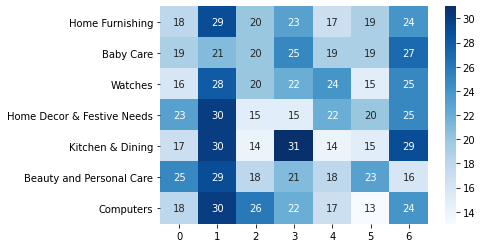

In [50]:
df_cm = pd.DataFrame(conf_mat, index=[label for label in list_labels],
                     columns=[i for i in "0123456"])
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

### Reduction de dimensions Class LV2

#### T-SNE

In [51]:
tsneV2 = manifold.TSNE(n_components=2, perplexity=30,
                       n_iter=2000, init='random', random_state=6)
X_tsneV2 = tsneV2.fit_transform(feat_pca)

df_tsneV2 = pd.DataFrame(X_tsneV2[:, 0:2], columns=['tsne1', 'tsne2'])
df_tsneV2["class"] = df["cat_lvl_2"]
print(df_tsneV2.shape)

(1050, 3)


### Clustering

In [52]:
len(df['cat_lvl_2'].unique())

62

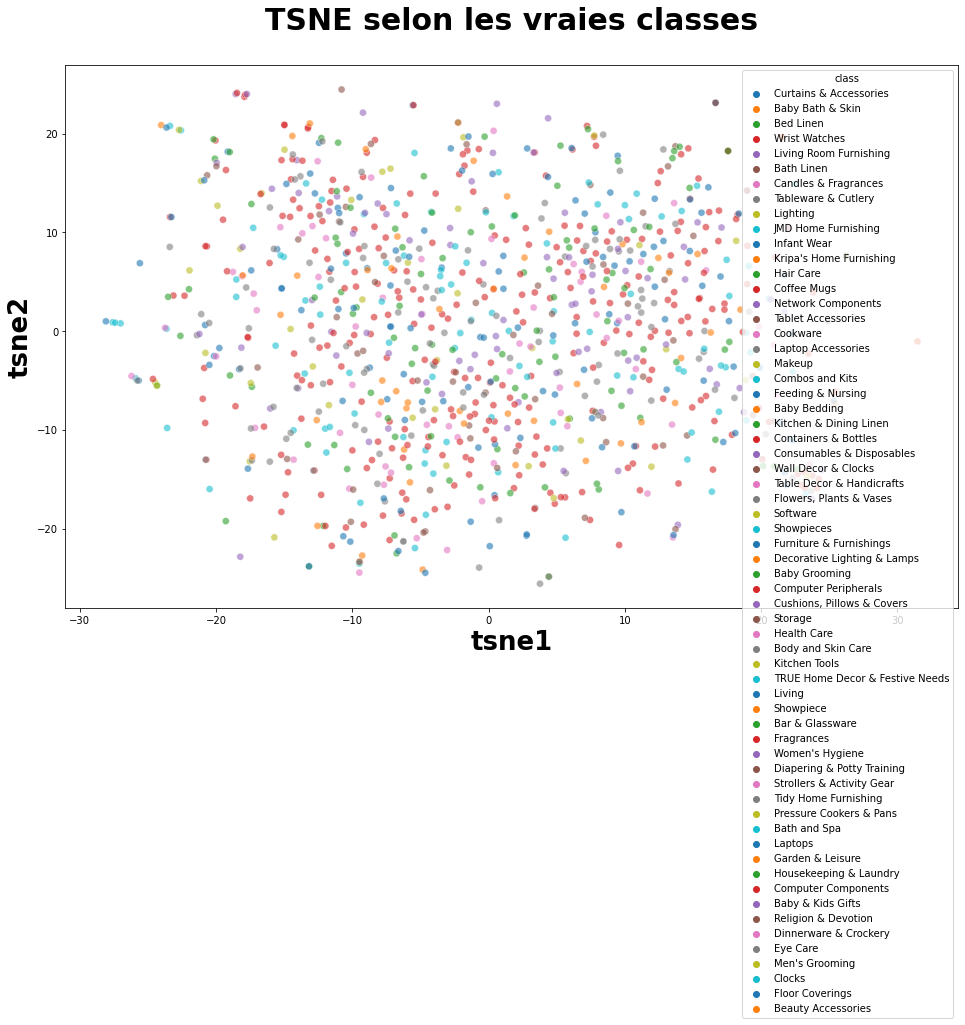

In [53]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsneV2, legend="brief",
    palette=sns.color_palette('tab10', n_colors=62), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes',
          fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')

plt.show()

#### Création de clusters d'images du TSNE

In [54]:
clsV2 = cluster.KMeans(n_clusters=62)
clsV2.fit(X_tsneV2)

df_tsneV2["cluster"] = clsV2.labels_
print(df_tsneV2.shape)

(1050, 4)


In [55]:
df_tsneV2.head(3)

tsne1      tsne2                   class  cluster
0  -5.557169  22.895555  Curtains & Accessories       54
1  25.398342  -7.314849        Baby Bath & Skin       61
2  -9.270807 -22.715034        Baby Bath & Skin       17

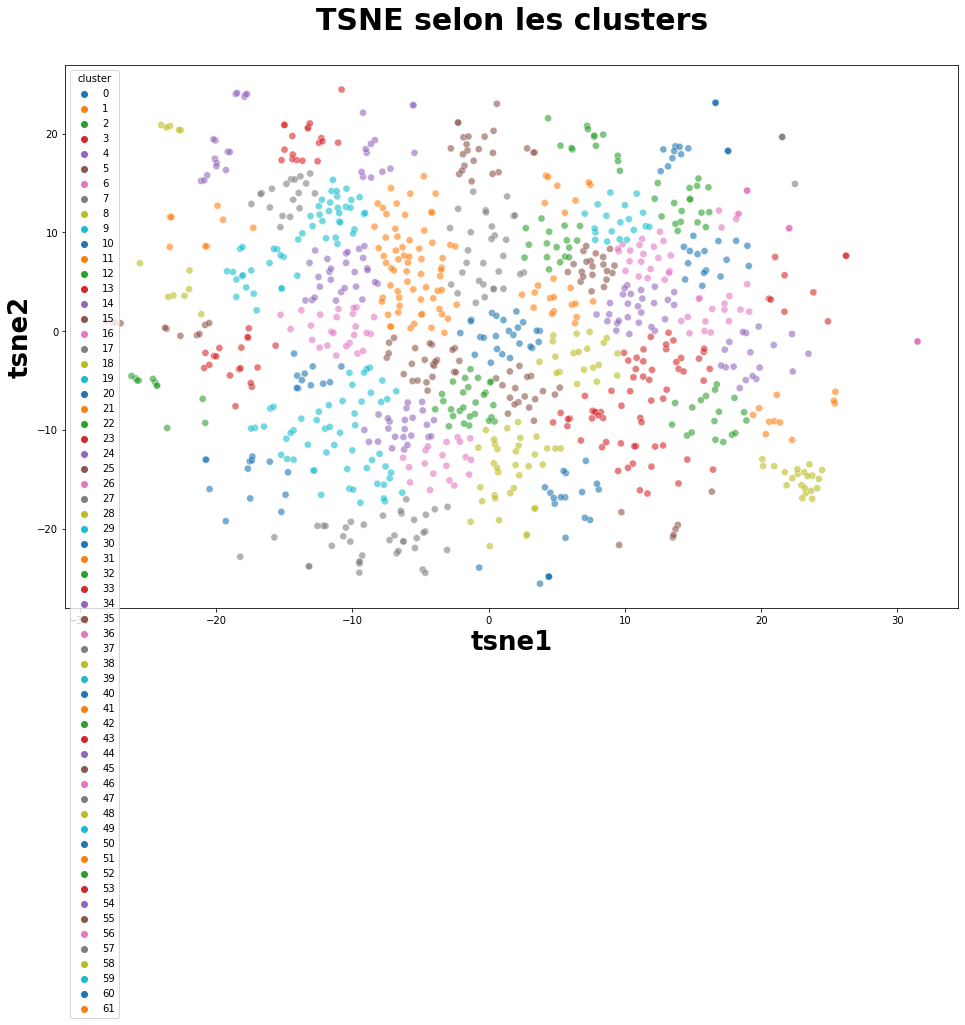

ARI :  -0.0022864061791657863


In [56]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=62), s=50, alpha=0.6,
    data=df_tsneV2,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize=30, pad=35, fontweight='bold')
plt.xlabel('tsne1', fontsize=26, fontweight='bold')
plt.ylabel('tsne2', fontsize=26, fontweight='bold')

plt.show()

labelsV2 = df_tsneV2["class"]
print("ARI : ", metrics.adjusted_rand_score(labelsV2, clsV2.labels_))

#### Analyse des clusters

In [57]:
le = preprocessing.LabelEncoder()
df_tsneV2["cat_label"] = le.fit_transform(df_tsneV2["class"])

In [58]:
df_tsneV2

tsne1      tsne2                   class  cluster  cat_label
0     -5.557169  22.895555  Curtains & Accessories       54         19
1     25.398342  -7.314849        Baby Bath & Skin       61          1
2     -9.270807 -22.715034        Baby Bath & Skin       17          1
3      5.955652  -8.849340               Bed Linen       23          8
4      1.004790  -2.327996               Bed Linen       50          8
...         ...        ...                     ...      ...        ...
1045  24.471310 -14.053449       Baby & Kids Gifts       18          0
1046  -2.824423  10.446085       Baby & Kids Gifts       57          0
1047  10.864320  -2.681169       Baby & Kids Gifts       33          0
1048  -9.942442   9.896101       Baby & Kids Gifts       59          0
1049  17.091751  10.505079       Baby & Kids Gifts       56          0

[1050 rows x 5 columns]

In [59]:
df_tsneV2[df_tsneV2['class'] == 'Wrist Watches']

tsne1      tsne2          class  cluster  cat_label
5    19.643110  -4.830457  Wrist Watches        4         61
6    16.652267  23.134130  Wrist Watches       40         61
7     3.385700  18.101931  Wrist Watches       15         61
8     1.571852  -6.737170  Wrist Watches       45         61
9   -20.703962 -13.008154  Wrist Watches       10         61
..         ...        ...            ...      ...        ...
795   0.165241  -3.188165  Wrist Watches       50         61
796  -7.747791 -18.669456  Wrist Watches       37         61
823 -12.770730 -14.097895  Wrist Watches       29         61
825  -3.900242  -3.090314  Wrist Watches        5         61
826  13.366091   7.674569  Wrist Watches       36         61

[149 rows x 5 columns]

### CNN

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

#### Préparation données

In [61]:
train, test = train_test_split(df, test_size=0.25, random_state=42)

In [62]:
train.to_csv('C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/train.csv')
test.to_csv('C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/test.csv')

In [63]:
train['image'] = train['image'].apply(lambda x: path+str(x))
test['image'] = test['image'].apply(lambda x: path+str(x))

<ipython-input-63-0ff9aa097a5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['image'] = train['image'].apply(lambda x: path+str(x))
<ipython-input-63-0ff9aa097a5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['image'] = test['image'].apply(lambda x: path+str(x))


In [64]:
def get_files(path_list):
    liste_image = []
    compteur = 0
    for image in path_list:
        im = Image_PIL.open(image).resize((128, 128))
        im2 = np.array(im)/255
        liste_image.append(im2)
        compteur += 1

    del compteur
    del im
    del im2

    return liste_image

In [65]:
train['image'].tolist()

['C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/785b4383b12106dd172306d427d8f7b2.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/45d0af2c709de47268c80c35a117de44.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/64b463dc0b75ae40a848498c657041e6.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/6b5cdfe68595fbcab0e05dc625d3d66a.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/17a73d7c4b02ada2bfeed1115fed08a4.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/bcb8e456728013a90ba66ab3b1b783ad.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/9059227d71995f88a1f48ff63830f716.jpg',
 'C:/Users/Damien/Desktop/Data Scientist/P6/Dataset/Flipkart/Images512/2baa415ebcc4fe563ce13b50e60efc1c.jpg',
 'C:/Users

In [66]:
# X_train et X_test sont les images du Dataframe
X_train = get_files(train['image'])
X_test = get_files(test['image'])

In [67]:
#X_train = X_train.reshape(-1,128,128,1)
#X_test  = X_test.reshape(-1,128,128,1)

In [68]:
print('X_train:', len(X_train))
print('X_test:', len(X_test))

X_train: 787
X_test: 263


In [69]:
# y_train et y_test sont les classes du Dataframe
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(train['cat_lvl_1'])
y_test = le.fit_transform(test['cat_lvl_1'])

In [70]:
print('y_train:', len(y_train))
print('y_test:', len(y_test))

y_train: 787
y_test: 263


In [71]:
X_train2 = tf.stack(X_train)
y_train2 = tf.stack(y_train)

In [72]:
X_test2 = tf.stack(X_test)
y_test2 = tf.stack(y_test)

#### Model

In [73]:
num_classes = 7

model = keras.models.Sequential()

model.add(keras.layers.Input((128, 128, 3)))
model.add(layers.Rescaling(1./255))

model.add(keras.layers.Conv2D(8, kernel_size=(
    3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(16, kernel_size=(
    3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                    

In [75]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
batch_size = 512
epochs = 16

history = model.fit(X_train2, y_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test2, y_test2))

Epoch 1/16
2/2 [==============================] - 2s 822ms/step - loss: 1.9458 - accuracy: 0.1398 - val_loss: 1.9471 - val_accuracy: 0.1825
Epoch 2/16
2/2 [==============================] - 2s 798ms/step - loss: 1.9426 - accuracy: 0.1995 - val_loss: 1.9536 - val_accuracy: 0.1293
Epoch 3/16
2/2 [==============================] - 2s 702ms/step - loss: 1.9403 - accuracy: 0.1779 - val_loss: 1.9475 - val_accuracy: 0.1521
Epoch 4/16
2/2 [==============================] - 2s 729ms/step - loss: 1.9346 - accuracy: 0.2389 - val_loss: 1.9447 - val_accuracy: 0.1141
Epoch 5/16
2/2 [==============================] - 2s 775ms/step - loss: 1.9301 - accuracy: 0.2147 - val_loss: 1.9454 - val_accuracy: 0.1711
Epoch 6/16
2/2 [==============================] - 2s 755ms/step - loss: 1.9248 - accuracy: 0.2262 - val_loss: 1.9414 - val_accuracy: 0.1635
Epoch 7/16
2/2 [==============================] - 2s 739ms/step - loss: 1.9155 - accuracy: 0.2427 - val_loss: 1.9291 - val_accuracy: 0.2548
Epoch 8/16
2/2 [====

In [77]:
score = model.evaluate(X_test2, y_test2, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 1.7707
Test accuracy : 0.2776


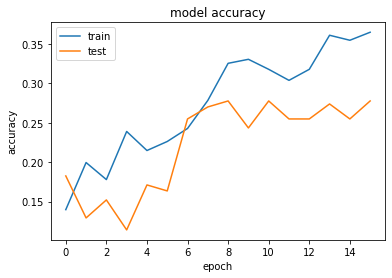

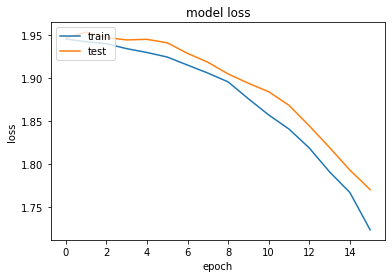

In [78]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

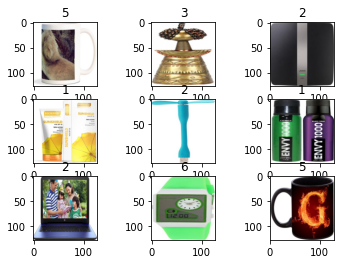

In [79]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i, title=y_train[i])
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [80]:
from sklearn.metrics import plot_confusion_matrix

In [81]:
# y_test vs y_pred
y_test

array([2, 5, 2, 1, 6, 0, 3, 2, 4, 4, 6, 0, 5, 1, 2, 2, 0, 2, 4, 4, 5, 2,
       0, 2, 6, 1, 3, 5, 1, 5, 5, 2, 2, 6, 3, 4, 6, 3, 3, 2, 4, 1, 5, 4,
       1, 5, 5, 2, 0, 4, 5, 3, 5, 4, 2, 0, 1, 5, 2, 4, 4, 0, 6, 5, 6, 4,
       0, 3, 4, 6, 0, 2, 2, 2, 6, 2, 4, 3, 2, 4, 4, 4, 2, 5, 2, 6, 4, 3,
       3, 3, 4, 4, 5, 3, 6, 2, 0, 6, 3, 0, 4, 6, 3, 4, 2, 6, 1, 5, 4, 2,
       5, 4, 4, 0, 0, 0, 2, 6, 6, 2, 2, 2, 3, 4, 5, 3, 1, 3, 0, 0, 5, 1,
       0, 3, 0, 5, 3, 1, 5, 2, 5, 0, 3, 4, 4, 6, 6, 1, 3, 1, 6, 1, 6, 3,
       2, 4, 6, 1, 3, 6, 6, 6, 0, 2, 3, 6, 6, 2, 6, 2, 6, 1, 4, 6, 0, 6,
       3, 3, 4, 3, 0, 5, 4, 3, 0, 1, 0, 6, 2, 4, 1, 6, 5, 4, 5, 2, 1, 5,
       2, 2, 1, 0, 4, 2, 1, 3, 6, 0, 0, 3, 6, 3, 2, 2, 4, 1, 0, 4, 3, 3,
       4, 0, 1, 4, 2, 3, 4, 0, 2, 1, 2, 2, 1, 2, 5, 4, 0, 6, 1, 4, 4, 4,
       4, 0, 3, 2, 3, 3, 0, 5, 0, 6, 5, 0, 5, 0, 5, 3, 1, 0, 0, 6, 6])

In [82]:
y_test.shape

(263,)

In [83]:
model.predict(np.array(X_test)).shape

(263, 7)

In [84]:
model.predict(np.array(X_test))

array([[0.18155484, 0.149381  , 0.14475273, ..., 0.10739628, 0.16324228,
        0.12107898],
       [0.20432988, 0.10530972, 0.13484164, ..., 0.101791  , 0.16774878,
        0.14971496],
       [0.13536592, 0.16981149, 0.21829917, ..., 0.09797876, 0.17222781,
        0.06679843],
       ...,
       [0.16687645, 0.09351435, 0.12482625, ..., 0.10505103, 0.19069737,
        0.15793596],
       [0.15965807, 0.07755236, 0.11987323, ..., 0.08072316, 0.21786007,
        0.19715986],
       [0.09858955, 0.15493666, 0.08818812, ..., 0.11937369, 0.12855874,
        0.26386163]], dtype=float32)

In [85]:
y_pred_Cmat = tf.keras.backend.argmax(
    model.predict(np.array(X_test)),
    axis=-1
)

In [86]:
np.array(y_pred_Cmat).shape

(263,)

In [87]:
#plot_confusion_matrix(estimator=history, X=y_test, y_true=np.array(y_pred_Cmat), labels=[0,1,2,3,4,5,6])
# plt.show()

In [88]:
conf_mat_transform(y_test, np.array(y_pred_Cmat))

Correspondance des clusters :  [3, 1, 2, 0, 4, 6, 5]


0      3
1      3
2      2
3      1
4      5
      ..
258    6
259    3
260    6
261    6
262    5
Name: y_pred_transform, Length: 263, dtype: int64

In [89]:
conf_mat2 = metrics.confusion_matrix(y_test, np.array(y_pred_Cmat))
print(conf_mat)

[[18 29 20 23 17 19 24]
 [19 21 20 25 19 19 27]
 [16 28 20 22 24 15 25]
 [23 30 15 15 22 20 25]
 [17 30 14 31 14 15 29]
 [25 29 18 21 18 23 16]
 [18 30 26 22 17 13 24]]


<AxesSubplot:>

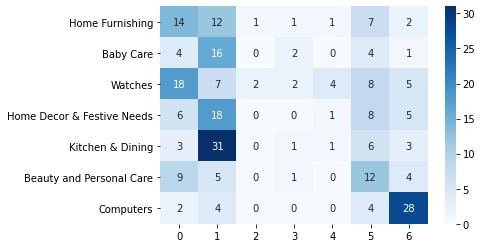

In [90]:
df_cm2 = pd.DataFrame(conf_mat2, index=[label for label in list_labels],
                      columns=[i for i in "0123456"])
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm2, annot=True, cmap="Blues")

### Transfert Learning

In [91]:
import tensorflow_hub as hub

In [92]:
VGG16_model = tf.keras.applications.vgg16.VGG16(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

In [93]:
#(224, 224, 3)
image_testTL = Image_PIL.open(path+list_photos[380]).resize((224, 224))

In [94]:
image_testTL = np.array(image_testTL)/255.0

In [95]:
image_testTL.shape

(224, 224, 3)

In [96]:
image_testTL2 = image_testTL.reshape(-1, 224, 224, 3)

In [97]:
image_testTL2.shape

(1, 224, 224, 3)

In [98]:
pred = VGG16_model.predict(image_testTL2)

In [99]:
np.argmax(pred)

999

In [100]:
from keras.applications.vgg16 import decode_predictions

In [101]:
label = decode_predictions(pred)
label = label[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

toilet_tissue (4.08%)


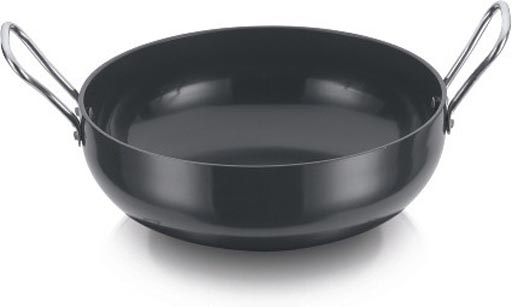

In [102]:
Image(path+list_photos[380], width=200)

### Fine Tuning (Features Extractor)

In [103]:
from keras.applications.vgg16 import VGG16

In [104]:
def get_files(path_list, size):
    liste_image = []
    compteur = 0
    for image in path_list:
        im = Image_PIL.open(image).resize((size, size))
        im2 = np.array(im)/255
        liste_image.append(im2)
        compteur += 1

    del compteur
    del im
    del im2

    return liste_image

In [105]:
# X_train et X_test sont les images du Dataframe
X_train_FT = get_files(train['image'], size=224)
X_test_FT = get_files(test['image'], size=224)

In [106]:
X_train_FT2 = tf.stack(X_train_FT)
X_test_FT2 = tf.stack(X_test_FT)

In [107]:
# y_train et y_test sont les classes du Dataframe
le = preprocessing.LabelEncoder()
y_train_FT = le.fit_transform(train['cat_lvl_1'])
y_test_FT = le.fit_transform(test['cat_lvl_1'])

In [108]:
from tensorflow.keras.utils import to_categorical

In [109]:
y_train_FT_cat = to_categorical(y_train_FT)
y_test_FT_cat = to_categorical(y_test_FT)

In [110]:
# Charger VGG16 sans couches de classification (include_top=False)
VGG_model = VGG16(weights='imagenet', include_top=False,
                  input_shape=(224, 224, 3))

In [111]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [112]:
for layer in VGG_model.layers:
    layer.trainable = False

In [113]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [114]:
features_FT = VGG_model.predict(X_train_FT2)

In [115]:
X_for_RF = features_FT.reshape(features_FT.shape[0], -1)

#### RandomForest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [117]:
# Estimator
RF_model = RandomForestClassifier()

params = {
    'n_estimators': [5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# GridSearch
grid_RF = GridSearchCV(RF_model, param_grid=params, cv=5)

In [118]:
grid_RF.fit(X_for_RF, y_train_FT)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [5, 10, 20, 50, 100]})

In [119]:
X_test_feature = VGG_model.predict(X_test_FT2)

In [120]:
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [121]:
prediction_RF = grid_RF.best_estimator_.predict(X_test_features)

In [122]:
true_prediction_RF = le.inverse_transform(prediction_RF)

In [123]:
print("Accuracy =", metrics.accuracy_score(
    test['cat_lvl_1'], true_prediction_RF))

Accuracy = 0.7908745247148289


                            precision    recall  f1-score   support

                 Baby Care       0.53      0.68      0.60        38
  Beauty and Personal Care       0.85      0.85      0.85        27
                 Computers       0.89      0.87      0.88        46
Home Decor & Festive Needs       0.73      0.71      0.72        38
           Home Furnishing       0.80      0.73      0.77        45
          Kitchen & Dining       0.86      0.81      0.83        31
                   Watches       0.97      0.89      0.93        38

                  accuracy                           0.79       263
                 macro avg       0.81      0.79      0.80       263
              weighted avg       0.80      0.79      0.80       263



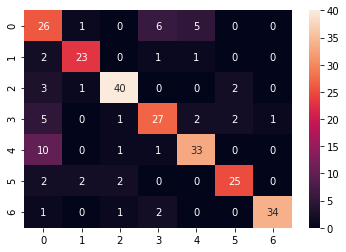

In [124]:
cm_RF = metrics.confusion_matrix(test['cat_lvl_1'], true_prediction_RF)
sns.heatmap(cm_RF, annot=True)

print(metrics.classification_report(test['cat_lvl_1'], true_prediction_RF))

loc:  147
The prediction for this image is:  ['Beauty and Personal Care']
The actual label for this image is:  Beauty and Personal Care


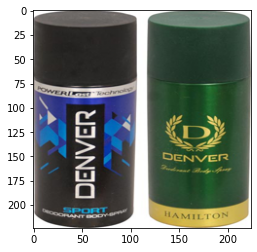

In [125]:
# Tests sur nos images
n = np.random.randint(0, X_test_FT2.shape[0])
img = X_test_FT[n]
plt.imshow(img)
# Expand dims so the input is (num images, x, y, c)
input_img = np.expand_dims(img, axis=0)
input_img_feature = VGG_model.predict(input_img)
input_img_features = input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = grid_RF.best_estimator_.predict(input_img_features)[0]
# Reverse the label encoder to original name
prediction_RF = le.inverse_transform([prediction_RF])
print("loc: ", n)
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test['cat_lvl_1'].iloc[n])

In [126]:
test.iloc[75]

uniq_id                                     d4b625befbbb7e8004e53c187f286e11
crawl_timestamp                                    2015-12-01 06:13:00 +0000
product_url                http://www.flipkart.com/binatone-wr3000n/p/itm...
product_name                                                Binatone WR3000N
pid                                                         RTRE2TYN2XUPCEVH
retail_price                                                          2995.0
discounted_price                                                      2500.0
image                      C:/Users/Damien/Desktop/Data Scientist/P6/Data...
is_FK_Advantage_product                                                False
description                Buy Binatone WR3000N only for Rs. 1800 from Fl...
product_rating                                           No rating available
overall_rating                                           No rating available
brand                                                               Binatone

#### RandomForest post TSNE

#### PCA

In [129]:
# X_for_RF = features du VGG16
print("Dimensions dataset avant réduction PCA : ", X_for_RF.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca_RF_train = pca.fit_transform(X_for_RF)
print("Dimensions dataset après réduction PCA : ", feat_pca_RF_train.shape)

Dimensions dataset avant réduction PCA :  (787, 25088)
Dimensions dataset après réduction PCA :  (787, 705)


In [130]:
# X_for_RF = features du VGG16
print("Dimensions dataset avant réduction PCA : ", X_for_RF.shape)
feat_pca_RF_test = pca.fit_transform(X_test_features)
print("Dimensions dataset après réduction PCA : ", feat_pca_RF_test.shape)

Dimensions dataset avant réduction PCA :  (787, 25088)
Dimensions dataset après réduction PCA :  (263, 248)


#### TNSE

In [135]:
# Faire une grid search pour changer les hyperparamètres, ou boucle for
# Regarder score silhouett, DB score
tsne = manifold.TSNE(n_components=2, perplexity=30,
                     n_iter=2000, init='random', random_state=6)
X_tsne_RF_train = tsne.fit_transform(feat_pca_RF_train)

#df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = df["cat_lvl_1"]
print(X_tsne_RF_train.shape)

(787, 2)


In [136]:
# Faire une grid search pour changer les hyperparamètres, ou boucle for
# Regarder score silhouett, DB score
X_tsne_RF_test = tsne.fit_transform(feat_pca_RF_test)

#df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = df["cat_lvl_1"]
print(X_tsne_RF_test.shape)

(263, 2)


In [137]:
# Estimator
RF_model = RandomForestClassifier()

params = {
    'n_estimators': [5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# GridSearch
grid_RF_tsne = GridSearchCV(RF_model, param_grid=params, cv=5)

In [138]:
grid_RF_tsne.fit(X_tsne_RF_train, y_train_FT)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [5, 10, 20, 50, 100]})

In [139]:
prediction_RF_tsne = grid_RF_tsne.best_estimator_.predict(X_tsne_RF_test)

In [140]:
true_prediction_RF_tsne = le.inverse_transform(prediction_RF_tsne)

In [141]:
print("Accuracy =", metrics.accuracy_score(
    test['cat_lvl_1'], true_prediction_RF_tsne))

Accuracy = 0.16730038022813687


#### SGDC Classifier

In [142]:
from sklearn.linear_model import SGDClassifier

In [143]:
# Estimator
SGDC_model = SGDClassifier()

params = {'penalty': ['l1', 'l2']}

# GridSearch
grid_SGDC = GridSearchCV(SGDC_model, param_grid=params, cv=5)

In [144]:
grid_SGDC.fit(X_for_RF, y_train_FT)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'penalty': ['l1', 'l2']})

In [145]:
prediction_SGDC = grid_SGDC.best_estimator_.predict(X_test_features)

In [146]:
true_prediction_SGDC = le.inverse_transform(prediction_SGDC)

In [147]:
print("Accuracy =", metrics.accuracy_score(
    test['cat_lvl_1'], true_prediction_SGDC))

Accuracy = 0.8326996197718631


#### Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
# Estimator
LR_model = LogisticRegression()

params_lr = {'C': [0.01, 0.1, 0.5, 0.9, 1, 1.1], }

# GridSearch RandomForest
grid_LR = GridSearchCV(LR_model, param_grid=params_lr, cv=5)

In [150]:
grid_LR.fit(X_for_RF, y_train_FT)

D:\Users\Damien\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\Damien\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

KeyboardInterrupt: 

In [ ]:
prediction_LR = grid_LR.best_estimator_.predict(X_test_features)

In [ ]:
true_prediction_LR = le.inverse_transform(prediction_LR)

In [ ]:
print("Accuracy =", metrics.accuracy_score(
    test['cat_lvl_1'], true_prediction_LR))